In [1]:
#Importing the required datasets
import numpy as np,pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from pprint import pprint
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [2]:
#Importing/Reading the file
train=pd.read_csv('train.csv')

In [84]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Salut
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1,Mr


In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null int64
Salut          891 non-null object
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [86]:
train["Salut"]=train.Name.apply(lambda x: x.split(',')[-1].split('.')[0].split(' ')[-1])
train.Salut.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [85]:
train_dict=train.groupby(["Salut"]).Age.mean()
pprint(train_dict)
train['Age']=train.apply(lambda row:train_dict[row["Salut"]] if np.isnan(row["Age"]) else row["Age"], axis = 1)

Salut
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64


In [82]:
train.drop('Cabin',axis=1,inplace=True)

KeyError: "labels ['Cabin'] not contained in axis"

In [83]:
train.Sex.unique()

array([1, 0], dtype=int64)

In [10]:
train.Sex=train.Sex.replace(['male','female'],[1,0])

In [14]:
train.Embarked.unique()

array([1, 2, 3], dtype=int64)

In [13]:
train.Embarked=train.Embarked.replace(['S','C','Q'],[1,2,3])

In [12]:
train.Embarked=train.Embarked.replace(np.nan,'S')

[(10, 0.8444444444444444),
 (11, 0.8666666666666667),
 (12, 0.8666666666666667),
 (13, 0.8666666666666667),
 (14, 0.8444444444444444),
 (15, 0.8888888888888888),
 (16, 0.8666666666666667),
 (17, 0.8888888888888888),
 (18, 0.8888888888888888),
 (19, 0.8888888888888888),
 (20, 0.8666666666666667),
 (21, 0.8444444444444444),
 (22, 0.8888888888888888),
 (23, 0.8666666666666667),
 (24, 0.8666666666666667),
 (25, 0.8666666666666667),
 (26, 0.8888888888888888),
 (27, 0.8888888888888888),
 (28, 0.8666666666666667),
 (29, 0.8444444444444444),
 (30, 0.8444444444444444),
 (31, 0.8888888888888888),
 (32, 0.8666666666666667),
 (33, 0.8666666666666667),
 (34, 0.8444444444444444),
 (35, 0.8888888888888888),
 (36, 0.8666666666666667),
 (37, 0.8666666666666667),
 (38, 0.9333333333333333),
 (39, 0.8222222222222222),
 (40, 0.8444444444444444),
 (41, 0.8666666666666667),
 (42, 0.8888888888888888),
 (43, 0.8444444444444444),
 (44, 0.8222222222222222),
 (45, 0.9111111111111111),
 (46, 0.8888888888888888),
 

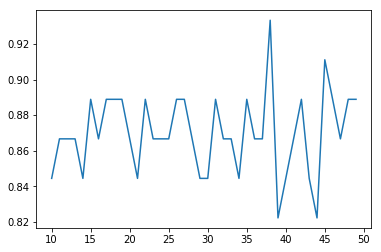

In [138]:
X=train.drop(['Survived','Name','Ticket','Salut'],axis=1)
Y=train.Survived
max_depth=range(10,50)
scores=[]
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.05,random_state=24)
for i in max_depth:
    forest=RandomForestClassifier(max_depth=i,max_leaf_nodes=10,min_samples_leaf=5,criterion='gini')
    forest.fit(X_train,Y_train)
    scores.append(forest.score(X_test,Y_test))
S=list(zip(max_depth,scores))
pprint(S)
plt.plot(max_depth,scores)
print(max(scores))

In [23]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest

In [24]:
datamatrix=xgb.DMatrix(data=X,label=Y)

In [72]:
steps=[('knn',KNeighborsClassifier()),
       ('dtc',DecisionTreeClassifier()),
        ('xgbclf',xgb.XGBRegressor()),
        ('rf',RandomForestClassifier()),
        ('scf',SVC())]

In [26]:
print(KNeighborsClassifier())
print(DecisionTreeClassifier())
print(xgb.XGBRegressor())
print(RandomForestClassifier())
print(SVC())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, 

## Making a list of dictionaries for each Classifier's parameters

In [165]:
param_grid=[{'knn__n_neighbors':np.arange(3,10)},
            {'dtc__criterion':['gini'],'dtc__max_leaf_nodes':np.arange(5,10),'dtc__max_depth':np.arange(5,50)},
            {'xgbclf__max_depth':np.arange(5,10),'xgbclf__learning_rate':[0.001],'xgbclf__n_estimators':np.arange(10,20)},
            {'rf__max_leaf_nodes':np.arange(5,15),'rf__max_depth':np.arange(5,15)}]

## Viewing the dictionary contents

In [166]:
print(param_grid)

[{'knn__n_neighbors': array([3, 4, 5, 6, 7, 8, 9])}, {'dtc__criterion': ['gini'], 'dtc__max_leaf_nodes': array([5, 6, 7, 8, 9]), 'dtc__max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])}, {'xgbclf__max_depth': array([5, 6, 7, 8, 9]), 'xgbclf__learning_rate': [0.001], 'xgbclf__n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])}, {'rf__max_leaf_nodes': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'rf__max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}]


## Using one classifier at a time in a pipeline

In [161]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
dtc.score(X_test,Y_test)

0.7111111111111111

In [167]:
from sklearn.preprocessing import LabelEncoder
j=0
for i in steps:
    print(j,i[-1])
    pip_steps=[i]
#     print(pip_steps)
    pipeline=Pipeline(pip_steps)
#     print(pipeline)
    estimator1 = GridSearchCV(pipeline, param_grid[j] ,cv =3, verbose=1, scoring="neg_mean_squared_error")
    estimator2 = RandomizedSearchCV(pipeline, param_grid[j],)
#     print(type(estimator))
    estimator.fit(X,Y)
    print('\n',estimator.best_params_)
    print('\n',np.sqrt(-1*estimator.best_score_),'\n\n\n\n')
    j=j+1
    if j>3:
        break

0 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.1s finished



 {'knn__n_neighbors': 3}

 0.6556325926315463 




1 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Fitting 3 folds for each of 225 candidates, totalling 675 fits


[Parallel(n_jobs=1)]: Done 675 out of 675 | elapsed:    6.1s finished



 {'dtc__criterion': 'gini', 'dtc__max_depth': 5, 'dtc__max_leaf_nodes': 6}

 0.4355163866123252 




2 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    6.6s finished



 {'xgbclf__learning_rate': 0.001, 'xgbclf__max_depth': 6, 'xgbclf__n_estimators': 19}

 0.4972595019026616 




3 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Fitting 3 folds for each of 100 candidates, totalling 300 fits

 {'rf__max_depth': 6, 'rf__max_leaf_nodes': 14}

 0.4237611507758188 






[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   10.9s finished


In [154]:
estimator

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'rf__max_leaf_nodes': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]), 'rf__max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)